In [ ]:
import pandas as pd

In [ ]:
d = []
for i in range(1,5):
    with open('D'+str(i)+'.txt', 'r') as file:
        d.append(file.read())

In [ ]:
char2gram = []
char2gram_size = []
for k in range(4):
    temp = set()
    for i in range(len(d[k])-1):
        temp.add(d[k][i:i+2])
    char2gram.append(temp)
    char2gram_size.append(len(temp))

In [ ]:
char2gram_size

In [ ]:
char3gram = []
char3gram_size = []
for k in range(4):
    temp = set()
    for i in range(len(d[k])-2):
        temp.add(d[k][i:i+3])
    char3gram.append(temp)
    char3gram_size.append(len(temp))

In [ ]:
char3gram_size

In [ ]:
word2gram = []
word2gram_size = []
for k in range(4):
    words = d[k].split()
    temp = set()
    for i in range(len(words)-1):
        temp.add(' '.join(words[i:i+2]))
    word2gram.append(temp)
    word2gram_size.append(len(temp))

In [ ]:
word2gram_size

In [ ]:
def jaccard(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

In [ ]:
for i in range(0,4):
    for j in range(i+1, 4):
        js1 = jaccard(char2gram[i], char2gram[j])
        js2 = jaccard(char3gram[i], char3gram[j])
        js3 = jaccard(word2gram[i], word2gram[j])
        print('JS({0:d},{1:d}) & {2:.3f} & {3:.3f} & {4:.3f} \\\\'.format(i+1, j+1, js1, js2, js3))

In [ ]:
import random
import string
import hashlib
import numpy as np
import time

In [ ]:
t = [20, 60, 150, 300, 600]
k = t[0]

In [ ]:
def randomsalt(k):
    salt = []
    for i in range(k):
        salt.append(''.join(random.choices(string.ascii_letters, k=10)))
    return salt

In [ ]:
def inf2darray(k):
    v = []
    v.append([float('inf')] * k)
    v.append([float('inf')] * k)
    v.append([float('inf')] * k)
    v.append([float('inf')] * k)
    return np.array(v)

In [ ]:
def jaccard_similarity(s1, s2):
    return sum(s1 == s2) / len(s1)

In [ ]:
actual_js = jaccard(char3gram[0], char3gram[1])

In [ ]:
result = {}
error = {}
runtime = {}
for k in t:
    sum_result = 0
    sum_error = 0
    sum_time= 0
    for n in range(20):
        start = time.time()
        salt = randomsalt(k)
        v = inf2darray(k)
        for d in range(2):
            for i in char3gram[d]:
                for j in range(k):
                    hashstr = hashlib.sha1((i+salt[j]).encode('utf-8')).hexdigest()
                    hashint = int(hashstr, 16) % 10000
                    if (hashint < v[d][j]):
                        v[d][j] = hashint
        pred_js = jaccard_similarity(v[0], v[1])
        sum_time += time.time() - start
        sum_result += pred_js
        sum_error += abs(actual_js - pred_js)
    result[k] = sum_result / 20
    error[k] = sum_error / 20
    runtime[k] = sum_time / 20

In [ ]:
result

In [ ]:
error

In [ ]:
runtime

In [ ]:
for key, value in result.items():
    print('{0:d} & {1:.5f} \\\\'.format(key, value))

In [ ]:
for tt in t:
    print('{0:d} & {1:.5f} & {2:.5f} & {3:.5f} & {4:.5f} \\\\'.format(tt, actual_js, result[tt], error[tt], runtime[tt]))

In [1]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot(runtime.values(), error.values(), 'o-')
plt.xlabel('Run Time')
plt.ylabel('Error')
plt.show()

In [2]:
import math
import numpy as np

In [3]:
def lsh(s, b, r):
    return 1 - (1 - s**b)**r

In [15]:
x = np.arange(0, 1, 0.001)

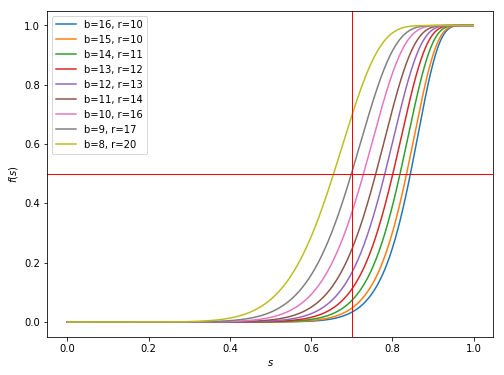

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(x, lsh(x, 16, 10))
plt.plot(x, lsh(x, 15, 10))
plt.plot(x, lsh(x, 14, 11))
plt.plot(x, lsh(x, 13, 12))
plt.plot(x, lsh(x, 12, 13))
plt.plot(x, lsh(x, 11, 14))
plt.plot(x, lsh(x, 10, 16))
plt.plot(x, lsh(x, 9, 17))
plt.plot(x, lsh(x, 8, 20))
plt.axvline(x=0.7, linewidth=1, color='r')
plt.axhline(y=0.5, linewidth=1, color='r')
plt.legend(labels=['b=16, r=10',
                   'b=15, r=10',
                   'b=14, r=11',
                   'b=13, r=12',
                   'b=12, r=13',
                   'b=11, r=14',
                   'b=10, r=16',
                   'b=9, r=17',
                   'b=8, r=20'])
plt.xlabel(r'$s$')
plt.ylabel(r'$f(s)$')
plt.show()

In [68]:
b = 9
r = 17

In [69]:
js = np.array([0.978, 0.580, 0.305, 0.568, 0.306, 0.312])

In [70]:
for s in js:
    fx = (1 - (1 - s ** b)**r)
    print('{0:.5f} & {1:.5f}'.format(s, fx))

0.97800 & 1.00000
0.58000 & 0.11904
0.30500 & 0.00039
0.56800 & 0.09962
0.30600 & 0.00040
0.31200 & 0.00048
